In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import misc
from PIL import Image
from random import sample

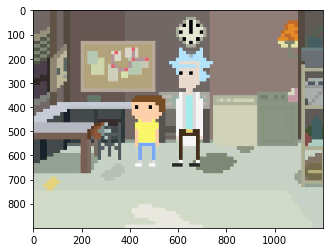

In [6]:
imagen_juego = Image.open('./resources/rick-and-morty.jpg')
imagen_juego_arr = np.array(imagen_juego) # 900x600 array
plt.imshow(imagen_juego_arr)

In [7]:
imagen_juego_arr
print(type(imagen_juego_arr))
print(imagen_juego_arr.shape)

<class 'numpy.ndarray'>
(900, 1200, 3)


In [8]:
#particion de la imagen en partes de 2x2
#imagen_juego_arr.flatten()

imagen_juego_arr_horizontal=np.split(imagen_juego_arr,2)
imagen_juego_arr_vertical_uno=np.hsplit(imagen_juego_arr_horizontal[0],2)
imagen_juego_arr_vertical_dos=np.hsplit(imagen_juego_arr_horizontal[1],2)
#imagen_juego_arr_vertical_tres=np.hsplit(imagen_juego_arr_horizontal[2],3)
imagen_en_partes=np.concatenate((imagen_juego_arr_vertical_uno,imagen_juego_arr_vertical_dos))
imagen_en_partes.shape

(4, 450, 600, 3)

In [9]:
#plt.imshow(imagen_juego_arr_vertical_uno[0])
print( imagen_en_partes[0].shape)
print( imagen_en_partes[1].shape)
print( imagen_en_partes[2].shape)
print( imagen_en_partes[3].shape)

(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)


In [561]:
espacio=np.zeros(9000).reshape(300,10,3) #espacios para la divicion vertical
espacio=espacio.astype(int)
espacio_h=np.zeros(27300).reshape(10,910,3) #espacios para la divicion horizontal
espacio_h=espacio_h.astype(int)
espacio_en_blanco=np.zeros(405000).reshape(1,300,450,3) #espacios en blanco(caja)
espacio_en_blanco=espacio_en_blanco.astype(int)

In [562]:
#agregamos un espacion en blanco al final de arreglo para poder usarlo despues
imagen_en_partes1=np.append(imagen_en_partes,espacio_en_blanco,axis = 0)
imagen_en_partes1.shape
print( imagen_en_partes1[0].shape)
print( imagen_en_partes1[1].shape)
print( imagen_en_partes1[2].shape)
print( imagen_en_partes1[3].shape)
print( imagen_en_partes1[4].shape)
print( imagen_en_partes1.shape)

(300, 450, 3)
(300, 450, 3)
(300, 450, 3)
(300, 450, 3)
(300, 450, 3)
(5, 300, 450, 3)


In [571]:
num_aleat=np.random.randint(0,4)
aleatorios=np.array(sample([x for x in range(0,4)],3))
aleatorios=np.insert(aleatorios,num_aleat,4)
print(aleatorios)

[3 0 1 4]


In [572]:
imagen_con_espacio_uno = np.concatenate((
    imagen_en_partes1[aleatorios[0]],
    #espacio,
    imagen_en_partes1[aleatorios[1]]
),axis=1)

imagen_con_espacio_dos=np.concatenate((
    imagen_en_partes1[aleatorios[2]],
    #espacio,
    imagen_en_partes1[aleatorios[3]]
),axis=1)

imagen_espacios_completa_prub=np.concatenate((
    imagen_con_espacio_uno,
    #espacio_h,
    imagen_con_espacio_dos
))

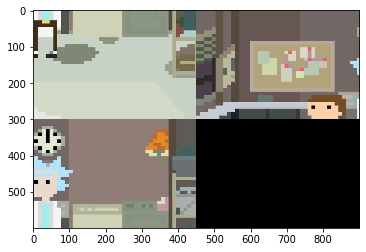

In [573]:
plt.imshow(imagen_espacios_completa_prub)

In [586]:
def inicio_desarmado():
    num_aleat=np.random.randint(0,4)
    aleatorios=np.array(sample([x for x in range(0,4)],3))
    aleatorios=np.insert(aleatorios,num_aleat,4)
    print(aleatorios)
    
    imagen_con_espacio_uno = np.concatenate((
    imagen_en_partes1[aleatorios[0]],
    #espacio,
    imagen_en_partes1[aleatorios[1]]
        ),axis=1)

    imagen_con_espacio_dos=np.concatenate((
    imagen_en_partes1[aleatorios[2]],
    #espacio,
    imagen_en_partes1[aleatorios[3]]
        ),axis=1)

    imagen_espacios_completa=np.concatenate((
    imagen_con_espacio_uno,
    #espacio_h,
    imagen_con_espacio_dos            
        ))        
    plt.imshow(imagen_espacios_completa)
    return imagen_espacios_completa

[1 0 2 4]


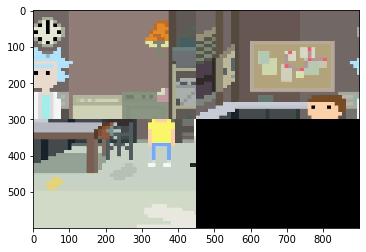

In [587]:
imagen_espacios_completa_Nueba=inicio_desarmado()

In [594]:
imagen_espacios_completa_Nueba
imagen_juego_arr_horizontal_1=np.split(imagen_espacios_completa_Nueba,2)
imagen_juego_arr_vertical_uno_1=np.hsplit(imagen_juego_arr_horizontal_1[0],2)
imagen_juego_arr_vertical_dos_1=np.hsplit(imagen_juego_arr_horizontal_1[1],2)

imagen_en_partes_N=np.concatenate((imagen_juego_arr_vertical_uno_1,
                                   imagen_juego_arr_vertical_dos_1))

#imagen_en_partes1=np.concatenate((imagen_juego_arr_vertical_uno[0],
                                 #imagen_juego_arr_vertical_uno[1]),axis = 1)

#imagen_en_partes2=np.concatenate((imagen_juego_arr_vertical_dos[0],
                                 #imagen_juego_arr_vertical_dos[1]),axis = 1)


#imagen_en_partes2.reshape(2,300, 900, 3)
#plt.imshow(imagen_en_partes_N[0])
#plt.imshow(imagen_en_partes_N[1])
#plt.imshow(imagen_en_partes_N[2])
#plt.imshow(imagen_en_partes_N[3])

imagen_en_partes_N.shape

(4, 300, 450, 3)

In [597]:
#construction 
def inicio_armado(etiqueta,posicion):
    
        
    imagen_con_espacio_uno = np.concatenate((
    imagen_en_partes_N[etiqueta],#3
    #espacio,
    imagen_en_partes_N[posicion]#0
        ),axis=1)
    
    imagen_con_espacio_dos=np.concatenate((
    imagen_en_partes_N[2],#2
    #espacio,
    imagen_en_partes_N[3]#1
        ),axis=1)
    
    imagen_espacios_completa_N=np.concatenate((
    imagen_con_espacio_uno,
    #espacio_h,
    imagen_con_espacio_dos            
        ))        
    plt.imshow(imagen_espacios_completa_N)

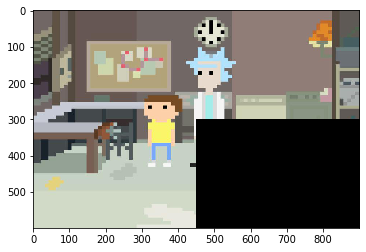

In [598]:
inicio_armado(1,0)

In [599]:
#nos fuimos porque el jupyter fallo --- pero lo logramos al final! ^^

In [4]:
def alterarindicies_dosXdos(tamanio,indice, movimiento):
    
    contenedor=np.arange(tamanio)
    print(contenedor)
    
    if (movimiento=="derecha"):                        
        
        contenedor[indice], contenedor[indice+1] = contenedor[indice+1], contenedor[indice]
        return contenedor
                
    elif (movimiento=="izquierda"):                
        
        contenedor[indice], contenedor[indice-1] = contenedor[indice-1], contenedor[indice]
        return contenedor
        
    elif (movimiento=="arriba"):
                        
        contenedor[indice], contenedor[indice-2] = contenedor[indice-2], contenedor[indice]
        return contenedor
        
    elif (movimiento=="abajo"):
        
        contenedor[indice], contenedor[indice+2] = contenedor[indice+2], contenedor[indice]
        return contenedor
        
    else:
        print("")

In [8]:
alterarindicies_dosXdos(4,2,"arriba")

[0 1 2 3]


array([2, 1, 0, 3])